# 数据分析

## 连接 colab drive

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
cd /content/drive/My Drive/NLP_study/classifier_study/

/content/drive/My Drive/NLP_study/classifier_study


## 加载相关库

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 全局变量设定

In [ ]:
data_path = "./data/"
train_data_path = data_path+"train.csv"
train_clean_all_path = data_path+"train_clean_all.csv"
train_clean_path = data_path+"train_clean.csv"

## 数据加载

In [0]:
train = pd.read_csv(train_data_path)

## 对标签进行统计学分析

### 统计学分析

In [0]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 不同标签数据量分析

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


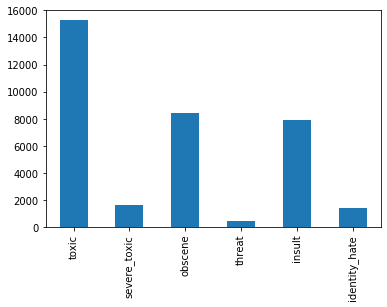

In [0]:
label = train.drop(['comment_text','id'],axis=1)
label_sum = label.sum()
label_sum.plot(kind='bar')
print(label_sum)
plt.show()

### 统计每行数据包含的标签数

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64
0.8983211235124177
0.03985686622255924
0.0218084739708343
0.026376973259552173
0.011029573042720795
0.002412719103095174
0.00019427088882065038


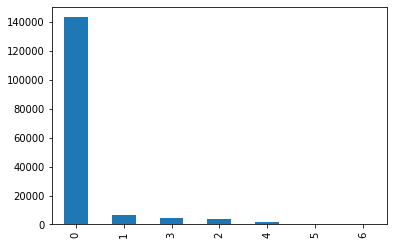

In [0]:
def sta(value_sum,count):
    print(value_sum[0]/len(count))
    print(value_sum[1]/len(count))
    print(value_sum[2]/len(count))
    print(value_sum[3]/len(count))
    print(value_sum[4]/len(count))
    print(value_sum[5]/len(count))
    print(value_sum[6]/len(count))

train_counts = label.sum(axis=1).value_counts()
print(train_counts)
train_counts.plot(kind='bar')
sta(train_counts,label)

## 对文本进行统计

In [0]:
def text_process(text):
    # 大小写转换
    lower = text.lower()
    # 标点符号的处理
    #string.punctuation中包含英文的标点，我们将其放在待去除变量remove中
    #函数需要三个参数，前两个表示字符的映射，我们是不需要的。
    remove = str.maketrans('','',string.punctuation) 
    without_punctuation = lower.translate(remove)
    # 分词 
    tokens = nltk.word_tokenize(without_punctuation)
    # 去除停用词
    without_stopwords = [w for w in tokens if not w in stopwords.words('english')]
    # 提取词干
    s = nltk.stem.SnowballStemmer('english')  #参数是选择的语言
    cleaned_text = [s.stem(ws) for ws in without_stopwords]
    cleaned_text_len = len(cleaned_text)
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text,cleaned_text_len


train['clean'],train['sent_len'] = zip(*train['comment_text'].apply(text_process)) 

In [0]:
train['sent_len'].describe()

count    159571.000000
mean         35.105314
std          54.282935
min           0.000000
25%           9.000000
50%          19.000000
75%          38.000000
max        1250.000000
Name: sent_len, dtype: float64

4     6513
5     6239
6     5776
7     5452
3     5393
8     5344
9     5255
10    4998
11    4692
12    4473
13    4173
14    3967
15    3716
16    3577
17    3360
18    3228
19    3050
2     3008
20    2981
21    2792
22    2710
23    2510
24    2402
25    2399
26    2319
27    2104
28    1909
29    1841
30    1744
31    1634
32    1584
33    1513
34    1496
36    1364
35    1340
37    1257
38    1197
39    1127
40    1060
41    1016
42     992
43     984
44     981
45     908
46     890
49     776
48     772
47     758
52     695
50     691
Name: sent_len, dtype: int64


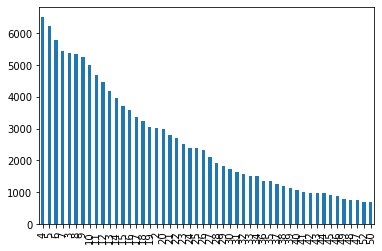

In [0]:
sent_len_count = train['sent_len'].value_counts()[0:50]
print(sent_len_count)
sent_len_count.plot(kind='bar')

In [0]:
len(train[train["sent_len"]>100])/len(train)

0.06536902068671625

In [0]:
train.to_csv(train_clean_all_path,encoding='utf-8')
train[["clean","toxic","severe_toxic","obscene","threat","insult","identity_hate"]].to_csv(train_clean_path,encoding='utf-8')

In [0]:
!nvidia-smi

Wed Mar 11 15:15:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  